In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# set path
print(os.getcwd())
os.chdir(r"C:\\Users\\nafis\\Documents\\Naf's files\\Courses\\DataCamp\\datacamp 5 - skill track - Applied Finance in Python\\1 Introduction to Portfolio Risk Management in Python\\data")  # Provide the new path here

C:\Users\nafis\Documents\Naf's files\Courses\DataCamp\datacamp 5 - skill track - Applied Finance in Python\1 Introduction to Portfolio Risk Management in Python\src


In [3]:
# The file you're going to load include daily Open, High, Low, Close, Adjusted Close, and Volume data, 
# often referred to as OHLCV data.

# Read in the csv file of returns for 9 Big Companies and parse dates
StockReturns = pd.read_csv("Big9Returns2017.csv", parse_dates = ['Date'])

# Convert the 'Date' column to index, so that we get Date as x-axis when we plot 
StockReturns = StockReturns.set_index(['Date'])

# Print only the first five rows of StockPrices
print("first_five_rows:", StockReturns.head())
print(StockReturns.info())

first_five_rows:                 AAPL      MSFT       XOM       JNJ       JPM      AMZN  \
Date                                                                     
2017-01-03  0.002849  0.007081  0.006980  0.005468  0.010894  0.005068   
2017-01-04 -0.001119 -0.004474 -0.011002 -0.001640  0.001844  0.004657   
2017-01-05  0.005085  0.000000 -0.014907  0.010463 -0.009205  0.030732   
2017-01-06  0.011148  0.008668 -0.000565 -0.004792  0.000116  0.019912   
2017-01-09  0.009159 -0.003183 -0.016497 -0.000172  0.000697  0.001168   

                  GE        FB         T  
Date                                      
2017-01-03  0.002848  0.015732  0.011521  
2017-01-04  0.000316  0.015660 -0.005811  
2017-01-05 -0.005678  0.016682 -0.002806  
2017-01-06  0.002855  0.022707 -0.019924  
2017-01-09 -0.004745  0.012074 -0.012585  
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2017-01-03 to 2017-12-29
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---

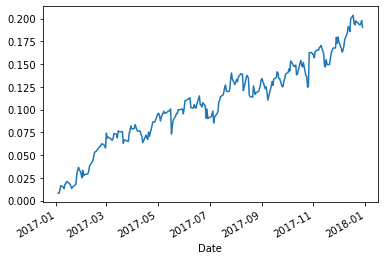

In [4]:
# Finish defining the portfolio weights as a numpy array
portfolio_weights = np.array([0.12, 0.15, 0.08, 0.05, 0.09, 0.10, 0.11, 0.14, 0.16])

# Calculate the weighted stock returns
WeightedReturns = StockReturns.mul(portfolio_weights, axis=1)

# StockReturns dataframe appended with calculated portfolio columns
StockReturns_portfolio_appended = StockReturns.copy()

# Calculate the portfolio returns
StockReturns_portfolio_appended['Portfolio'] = WeightedReturns.sum(axis=1)

# Plot the cumulative portfolio returns over time
CumulativeReturns = ((1+StockReturns_portfolio_appended["Portfolio"]).cumprod()-1)
CumulativeReturns.plot() 
plt.show()

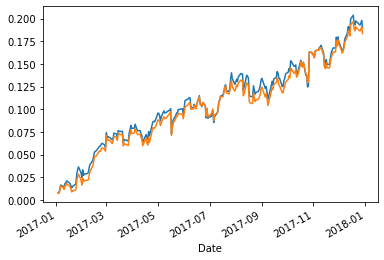

In [5]:
# How many stocks are in your portfolio?
numstocks = 9

# Create an array of equal weights across all assets
portfolio_weights_ew = np.repeat(1/numstocks, numstocks)

# Calculate the equally-weighted portfolio returns
StockReturns_portfolio_appended['Portfolio_EW'] = StockReturns.iloc[:, 0:numstocks].mul(portfolio_weights_ew, axis=1).sum(axis=1)
CumulativeReturns_EW = ((1+StockReturns_portfolio_appended["Portfolio_EW"]).cumprod()-1)

# def cumulative_returns_plot(array1, label1, array2, label2):
#     array1.plot(color = 'r', label = label1)
#     array2.plot(color = 'b', label = label2)

# cumulative_returns_plot(CumulativeReturns,'Portfolio', CumulativeReturns_EW, 'Portfolio_EW')


def cumulative_returns_plot(*args, **kwargs):
   for arr in args:
      arr.plot()

cumulative_returns_plot(CumulativeReturns, CumulativeReturns_EW)


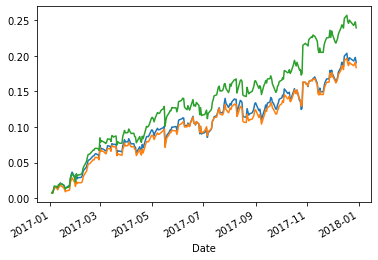

In [6]:
# Create an array of market capitalizations (in billions)
market_capitalizations = np.array([601.51, 469.25, 349.5, 310.48, 299.77, 356.94, 268.88, 331.57, 246.09])

# Calculate the market cap weights
mcap_weights = market_capitalizations / sum(market_capitalizations)

# Calculate the market cap weighted portfolio returns
StockReturns_portfolio_appended['Portfolio_MCap'] = StockReturns.iloc[:, 0:9].mul(mcap_weights, axis=1).sum(axis=1)
CumulativeReturns_MCap = ((1+StockReturns_portfolio_appended["Portfolio_MCap"]).cumprod()-1)

cumulative_returns_plot(CumulativeReturns, CumulativeReturns_EW, CumulativeReturns_MCap)

In [7]:
# Calculate the correlation matrix
#StockReturns = StockReturns.drop(['Portfolio', 'Portfolio_EW', 'Portfolio_MCap'], axis = 1)
correlation_matrix = StockReturns.corr()

# Print the correlation matrix
print(correlation_matrix)

          AAPL      MSFT       XOM       JNJ       JPM      AMZN        GE  \
AAPL  1.000000  0.437430  0.055505  0.038432  0.199914  0.509472  0.006766   
MSFT  0.437430  1.000000  0.084108  0.230215  0.191248  0.621096 -0.044827   
XOM   0.055505  0.084108  1.000000  0.121012  0.305926  0.015118  0.193861   
JNJ   0.038432  0.230215  0.121012  1.000000  0.070328  0.052781  0.067930   
JPM   0.199914  0.191248  0.305926  0.070328  1.000000  0.013919  0.257401   
AMZN  0.509472  0.621096  0.015118  0.052781  0.013919  1.000000 -0.092188   
GE    0.006766 -0.044827  0.193861  0.067930  0.257401 -0.092188  1.000000   
FB    0.542367  0.543341 -0.046813  0.079391  0.095245  0.653030 -0.024364   
T     0.005082 -0.021079  0.197576  0.091622  0.252832 -0.017909  0.292706   

            FB         T  
AAPL  0.542367  0.005082  
MSFT  0.543341 -0.021079  
XOM  -0.046813  0.197576  
JNJ   0.079391  0.091622  
JPM   0.095245  0.252832  
AMZN  0.653030 -0.017909  
GE   -0.024364  0.292706  
FB 

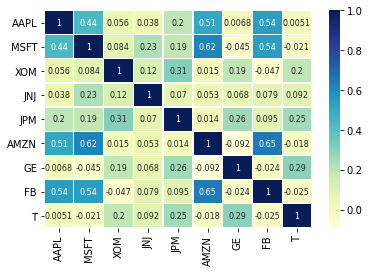

In [8]:
# Create a heatmap
sns.heatmap(correlation_matrix,
            annot=True,
            cmap="YlGnBu", 
            linewidths=0.3,
            annot_kws={"size": 8})

# Plot aesthetics
plt.xticks(rotation=90)
plt.yticks(rotation=0) 
plt.show()

In [9]:
StockReturns.cov().shape

(9, 9)

In [10]:
# Calculate the covariance matrix
cov_mat = StockReturns.cov()

# Annualize the co-variance matrix
cov_mat_annual = cov_mat*252

# Print the annualized co-variance matrix
print("cov_mat_annual:", cov_mat_annual)

# Calculate the portfolio standard deviation
portfolio_volatility = np.sqrt(np.dot(portfolio_weights.T, np.dot(cov_mat_annual, portfolio_weights)))
print("portfolio_volatility:", portfolio_volatility)


cov_mat_annual:           AAPL      MSFT       XOM       JNJ       JPM      AMZN        GE  \
AAPL  0.030996  0.011400  0.001093  0.000774  0.005716  0.018805  0.000236   
MSFT  0.011400  0.021912  0.001392  0.003899  0.004597  0.019275 -0.001315   
XOM   0.001093  0.001392  0.012500  0.001548  0.005554  0.000354  0.004295   
JNJ   0.000774  0.003899  0.001548  0.013092  0.001307  0.001266  0.001540   
JPM   0.005716  0.004597  0.005554  0.001307  0.026371  0.000474  0.008283   
AMZN  0.018805  0.019275  0.000354  0.001266  0.000474  0.043954 -0.003830   
GE    0.000236 -0.001315  0.004295  0.001540  0.008283 -0.003830  0.039270   
FB    0.016243  0.013682 -0.000890  0.001545  0.002631  0.023290 -0.000821   
T     0.000152 -0.000530  0.003751  0.001780  0.006972 -0.000638  0.009849   

            FB         T  
AAPL  0.016243  0.000152  
MSFT  0.013682 -0.000530  
XOM  -0.000890  0.003751  
JNJ   0.001545  0.001780  
JPM   0.002631  0.006972  
AMZN  0.023290 -0.000638  
GE   -0.000821

In [11]:
# Read in the new csv file of random portfolios to analyize risk (volatility) vs return via Sharpe ratio & efficient frontier
RandomPortfolios = pd.read_csv("EfficientFrontierPortfoliosSlim.csv")

# Set 'Risk Free' variable
risk_free = 0
# Calculate the Sharpe Ratio for each asset
RandomPortfolios['Sharpe'] = (RandomPortfolios['Returns'] - risk_free) / RandomPortfolios['Volatility']

# Print the range of Sharpe ratios
print(RandomPortfolios['Sharpe'].describe()[['min', 'max']])

min    0.742884
max    2.270462
Name: Sharpe, dtype: float64


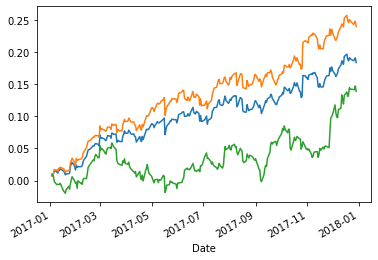

In [12]:
# MSR Portfolio: 
# Sort the portfolios by Sharpe ratio
sorted_portfolios = RandomPortfolios.sort_values(by=['Sharpe'], ascending=False)

# Extract the corresponding weights
MSR_weights = sorted_portfolios.iloc[0, 0:numstocks]

# Cast the MSR weights as a numpy array
MSR_weights_array = np.array(MSR_weights)

# Calculate the MSR portfolio returns
StockReturns_portfolio_appended['Portfolio_MSR'] = StockReturns.iloc[:, 0:numstocks].mul(MSR_weights_array, axis=1).sum(axis=1)
CumulativeReturns_MSR = ((1+StockReturns_portfolio_appended["Portfolio_MSR"]).cumprod()-1)

# Plot the cumulative returns
cumulative_returns_plot(CumulativeReturns_EW, CumulativeReturns_MCap, CumulativeReturns_MSR)

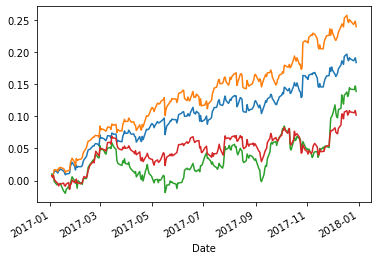

In [13]:
# GMV Portfolio: 
# Sort the portfolios by volatility
sorted_portfolios = RandomPortfolios.sort_values(by=['Volatility'], ascending=True)

# Extract the corresponding weights
GMV_weights = sorted_portfolios.iloc[0, 0:numstocks]

# Cast the GMV weights as a numpy array
GMV_weights_array = np.array(GMV_weights)

# Calculate the GMV portfolio returns
StockReturns_portfolio_appended['Portfolio_GMV'] = StockReturns.iloc[:, 0:numstocks].mul(GMV_weights_array, axis=1).sum(axis=1)
CumulativeReturns_GMV = ((1+StockReturns_portfolio_appended["Portfolio_GMV"]).cumprod()-1)

# Plot the cumulative returns
cumulative_returns_plot(CumulativeReturns_EW, CumulativeReturns_MCap, CumulativeReturns_MSR, CumulativeReturns_GMV)